### APWP construction
This notebook allows apparent polar wander paths to be generated from dataframes of paleomagnetic poles and virtual geomagnetic poles, as returned by the functions living in the utils_compilation.py file.

In [1]:
import os
import re
import numpy as np
import pandas as pd
from pmagpy import ipmag, pmag
import scripts.auxiliar as aux
from scripts.utils_compilation import generates_compilation, merge_all_files
from scripts.utils_APWPs import running_mean_APWP, plot_poles

import seaborn as sns

pd.set_option('display.max_columns', None)

### Set the path where the all the files live.

In [2]:
current_path = os.getcwd()

### Set the including criterias. Note: default as None (not False)
The basic selections is the one made by the author, one should always start with that base: `'author_selection': True`.

On top of that, there's the option to include other boolean criterias as well (e.g. setting `'shallowed': True`)

In [3]:
# the basic dataset starts with the author selection
incl_criteria = {
    'author_selection': True,     # True or False; if 1, all other criteria will be ignored
    'undemagnetized': None,    # None (defaults to author selection) or True  
    'sample_count': None,      # None (defaults to author selection) or int: cutoff n (≥ x)
    'alpha_95': None,          # None (defaults to author selection) or float: cutoff A95 (≤ x degrees)
    'overprints': None,        # None (defaults to author selection) or True  
    'remagnetizations': None,  # None (defaults to author selection) or True
    'uncertain_struct': None,  # None (defaults to author selection) or True
    'rotated': None,           # None (defaults to author selection) or True
    'shallowed': None,         # None (defaults to author selection) or True [***can also implement cutoff f-value here if desired***]
    'anomalous_dir': None,     # None (defaults to author selection) or float: cutoff distance (in degrees) between vgp and mean (≤ x degrees)
    'uncertain_age': None,     # None (defaults to author selection) or float: cutoff age resolution (in Myr) between min and max (≤ x Myr)
    'distinct_age': None,      # None (defaults to author selection) or True
    'sub-time_units': True,    # None (defaults to author selection) or True (evaluates the dispersion of the supposed spot-readings)
    'rock_type': None,         # None (defaults to author selection) or string: 'all' or 'igneous' or 'sedimentary'
    'otherwise_rej': None     # None (defaults to author selection) or 'y'
    }

Generate an unfilterded DataFrame for VGPs and other for Poles

In [4]:
df_vgp_unfiltered, df_poles_original = merge_all_files(current_path)

processing file 0
processing file 1
processing file 2
processing file 3
processing file 4
processing file 5
processing file 6
processing file 7
processing file 8
processing file 9
processing file 10
processing file 11
processing file 12
processing file 13
processing file 14
processing file 15
processing file 16
processing file 17
processing file 18
processing file 19
processing file 20
processing file 21
processing file 22
processing file 23
processing file 24
processing file 25
processing file 26
processing file 27
processing file 28
processing file 29
processing file 30
processing file 31
processing file 32
processing file 33


#### Generate the compilation following the criterias listed in the dictionary

In [5]:
df_vgp_compilation, df_pole_compilation = generates_compilation(df_vgp_unfiltered, df_poles_original, incl_criteria)

#### Visualize the compilation and the criterias listed above in order to test (please spetial atention in the selection, seems to be working fine but the more eyes on it, the better)

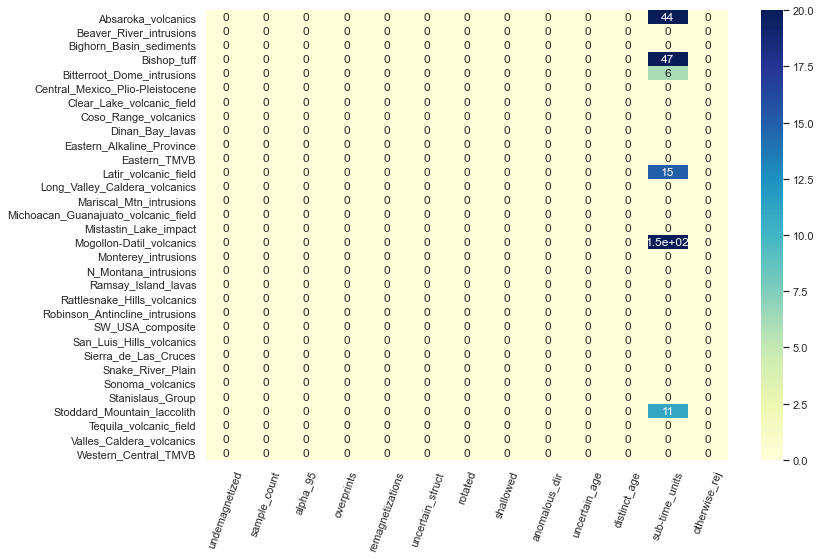

In [6]:
keys = ['undemagnetized','sample_count','alpha_95','overprints','remagnetizations','uncertain_struct','rotated','shallowed',
        'anomalous_dir','uncertain_age','distinct_age','sub-time_units','otherwise_rej']
values = [df_vgp_compilation.groupby(['Study'])[i].sum().tolist() for i in keys]

df_test = pd.DataFrame(columns = keys)
for key, value in zip(keys, values):
    df_test[key] = value
        
sns.set(rc={'figure.figsize':(11.7,8.27)})    
ax = sns.heatmap(df_test, 
                 cmap="YlGnBu", yticklabels = df_vgp_compilation['Study'].unique(), annot = True, vmin = 0, vmax = 20)
ax.tick_params(axis='x', rotation=70)

<AxesSubplot:xlabel='mean_age', ylabel='Count'>

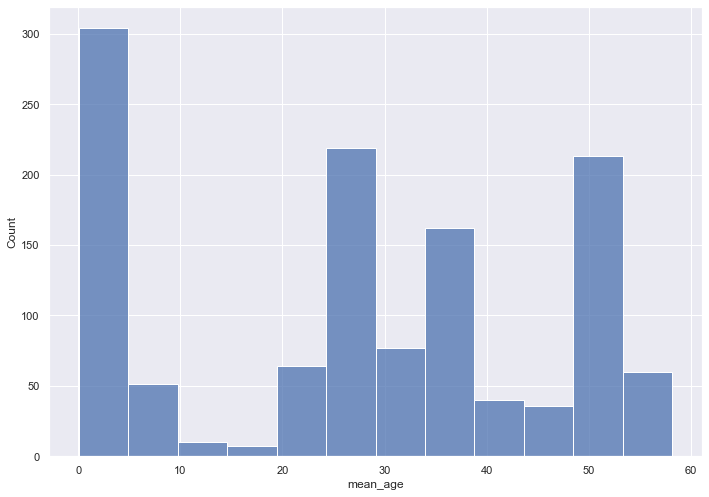

In [7]:
sns.histplot(data = df_vgp_compilation, x = 'mean_age')

In [8]:
df_pole_compilation.head()

,pole,name,slat,slon,N,dec,inc,k,alpha95,f_corr,Plat,Plon,K,A95,dp,dm,mean_age,min_age,2sig_min,max_age,2sig_max,uncer_dist,rock_typ_1,rock_typ_2,rock_typ_3,R1,R2a,R2b,R3,R4,R5a,R5b,R6,R7,pmag_ref,age_ref,pmag_comments,age_comments,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,Absaroka_volcanics,44.497248,250.265645,82,NaN,NaN,NaN,NaN,NaN,-75.574205,304.948643,11.256850,4.879511,NaN,NaN,49.5000,45,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Beaver_River_intrusions,60.238151,234.652209,21,NaN,NaN,NaN,NaN,NaN,-79.313242,327.669841,44.972756,4.792312,NaN,NaN,42.0000,40.5,NaN,43.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Bighorn_Basin_sediments,44.459816,251.809627,59,NaN,NaN,NaN,NaN,NaN,-81.549042,2.761738,10.640570,5.954672,NaN,NaN,55.8885,52.54,NaN,59.237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Bishop_tuff,37.670000,241.250000,47,NaN,NaN,NaN,NaN,NaN,-80.253855,315.842538,88.326385,2.225108,NaN,NaN,0.7670,0.7661,NaN,0.7679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Bitterroot_Dome_intrusions,46.178654,245.450901,22,NaN,NaN,NaN,NaN,NaN,-79.797729,48.121618,7.207205,12.421349,NaN,NaN,50.9500,46.4,NaN,55.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
min_age = 0
max_age = 60
window_length = 20
time_step = 10

RM_APWP = running_mean_APWP(df_pole_compilation, 'Plon', 'Plat', 'mean_age', window_length, time_step, max_age, min_age)
print (RM_APWP)

    age     N       A95        plon       plat
0   0.0  16.0  3.547014  287.092171 -87.702911
1  10.0  16.0  3.547014  287.092171 -87.702911
2  20.0   4.0  8.156954  318.854566 -82.227077
3  30.0   7.0  4.001716  310.875899 -83.023622
4  40.0   8.0  4.106473  321.424395 -82.823015
5  50.0   9.0  4.245991  345.791011 -81.951820
6  60.0   4.0  6.728942    2.561508 -81.535480


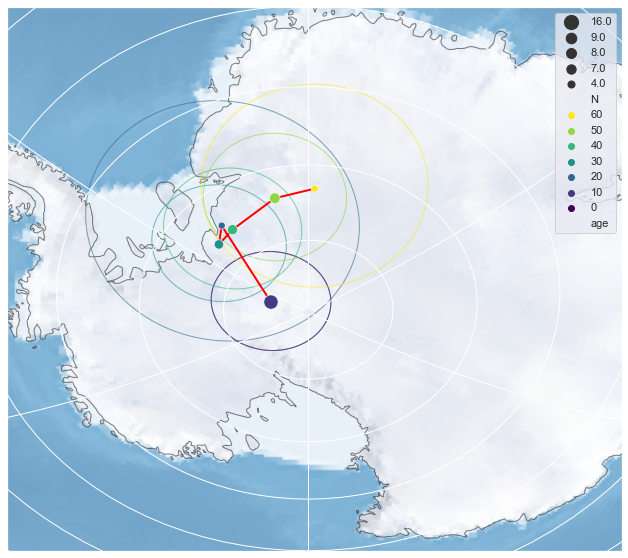

In [10]:
extent = (-180,180,-70,-90)
plot_poles(RM_APWP, 'plon', 'plat', 'A95', 'age', 'N', extent, connect_poles=True)

In [11]:
df_vgp_compilation.head()

,name,fm./loc.,slat,slon,n,dec,inc,k,alpha95,f_corr,VGP_lat,VGP_lon,K,A95,dp,dm,mean_age,min_age,2sig_min,max_age,2sig_max,uncer_dist,rock_typ_1,rock_typ_2,rock_typ_3,demag,struc_cont,rot_area,polarity,strat_group,ordering,synch_unit,in_study_pole,rej_crit,pmag_ref,age_ref,pmag_comments,age_comments,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Study,VGP_lon_recalc,VGP_lat_recalc,dec_reverse,inc_reverse,vgp_lat_SH,vgp_lon_SH,age_uncertainty,author_selection,undemagnetized,sample_count,alpha_95,overprints,remagnetizations,uncertain_struct,rotated,shallowed,anomalous_dir,uncertain_age,distinct_age,sub-time_units,otherwise_rej,keep
0,6,Sylvan Pass,44.3478,-111.0455,5,343.4,64.3,58.3,8.2,NaN,78.2,-186.7,NaN,NaN,NaN,NaN,48.5,48,NaN,49,NaN,uniform,igneous,volcanic,basalt,AF,1,0,N,1.0,1.0,0,1,[],Shive and Pruss (1977),Harlan and Morgan (2010),NaN,crude age range provided by Harlan and Morgan ...,NaN,NaN,NaN,NaN,NaN,Absaroka_volcanics,173.300455,78.199980,-64.3,163.4,-78.199980,353.300455,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,8,Sylvan Pass,44.5500,-110.0500,5,121.8,-73.1,165.6,4.9,NaN,52.6,-156.7,NaN,NaN,NaN,NaN,48.5,48,NaN,49,NaN,uniform,igneous,volcanic,basalt,AF,1,0,R,1.0,3.0,0,1,[],Shive and Pruss (1977),Harlan and Morgan (2010),NaN,crude age range provided by Harlan and Morgan ...,NaN,NaN,NaN,NaN,NaN,Absaroka_volcanics,23.328823,-52.611427,-73.1,121.8,-52.611427,23.328823,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,39,Jim Mountain to Trout Peak,44.5500,-109.2000,3,8.8,57.2,42.6,12.4,NaN,80.6,23.3,NaN,NaN,NaN,NaN,48.5,48,NaN,49,NaN,uniform,igneous,volcanic,basalt,AF,1,0,N,2.0,7.0,0,1,[],Shive and Pruss (1977),Harlan and Morgan (2010),NaN,crude age range provided by Harlan and Morgan ...,NaN,NaN,NaN,NaN,NaN,Absaroka_volcanics,23.338313,80.558229,-57.2,188.8,-80.558229,203.338313,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10,40,Jim Mountain to Trout Peak,44.7500,-109.3400,3,319.5,36.8,41.0,12.6,NaN,48.8,138.1,NaN,NaN,NaN,NaN,48.5,48,NaN,49,NaN,uniform,igneous,volcanic,basalt,AF,1,0,N,2.0,8.0,0,1,[],Shive and Pruss (1977),Harlan and Morgan (2010),NaN,crude age range provided by Harlan and Morgan ...,NaN,NaN,NaN,NaN,NaN,Absaroka_volcanics,138.108547,48.802946,-36.8,139.5,-48.802946,318.108547,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
12,51,Jim Mountain to Trout Peak,44.4900,-109.5300,4,333.1,77.3,85.7,7.6,NaN,64.2,-134.8,NaN,NaN,NaN,NaN,48.5,48,NaN,49,NaN,uniform,igneous,volcanic,basalt,AF,1,0,N,2.0,10.0,0,1,[],Shive and Pruss (1977),Harlan and Morgan (2010),NaN,crude age range provided by Harlan and Morgan ...,NaN,NaN,NaN,NaN,NaN,Absaroka_volcanics,225.185052,64.197926,-77.3,153.1,-64.197926,45.185052,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [16]:
min_age = 0
max_age = 60
window_length = 20
time_step =10

RM_APWP = running_mean_APWP(df_vgp_compilation, 'vgp_lon_SH', 'vgp_lat_SH', 'mean_age', window_length, time_step, max_age, min_age)
print (RM_APWP)

    age      N       A95        plon       plat
0   0.0  356.0  1.502574  316.745609 -86.952495
1  10.0  386.0  1.521512  323.555321 -86.505097
2  20.0  316.0  2.600393  289.611273 -83.565733
3  30.0  508.0  1.885712  309.476762 -83.494339
4  40.0  387.0  1.895093  329.328518 -81.168834
5  50.0  349.0  2.147927  338.998623 -81.477556
6  60.0  185.0  3.008466  359.403934 -81.714807


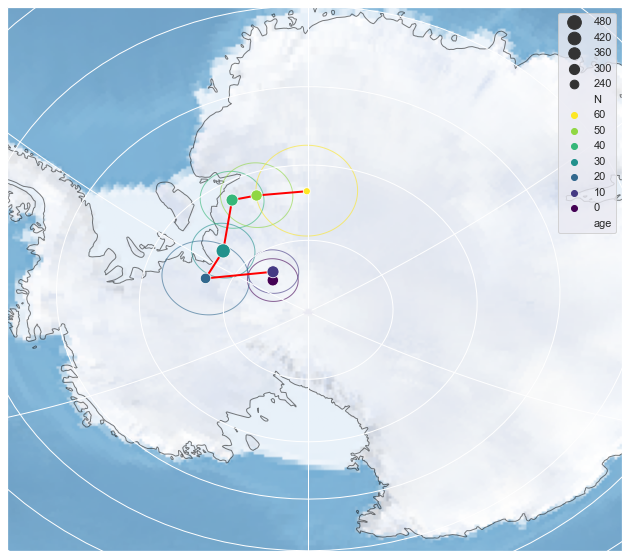

In [17]:
extent = (-180,180,-70,-90)
plot_poles(RM_APWP, 'plon', 'plat', 'A95', 'age', 'N', extent, connect_poles=True)